In [2]:
def calculate_conv_output(input_size, kernel_sizes, strides, paddings, out_channels):
    """
    Calculate the dimensions at each layer of a convolutional network.
    
    Parameters:
        input_size (tuple): Initial input dimensions (height, width).
        kernel_sizes (list): List of kernel sizes for each layer (assume square kernels).
        strides (list): List of stride values for each layer.
        paddings (list): List of padding values for each layer.
        out_channels (list): List of output channels for each layer.

    Returns:
        list: Dimensions at each layer (height, width, channels).
        int: Flattened dimension after all layers.
    """
    # Initialize the dimensions
    h, w = input_size
    dimensions = []
    
    for i in range(len(kernel_sizes)):
        # Compute the output height and width for the current layer
        h = (h + 2 * paddings[i] - kernel_sizes[i]) // strides[i] + 1
        w = (w + 2 * paddings[i] - kernel_sizes[i]) // strides[i] + 1
        # Append the dimensions (height, width, channels)
        dimensions.append((h, w, out_channels[i]))
    
    # Compute the flattened size
    flattened_size = dimensions[-1][0] * dimensions[-1][1] * dimensions[-1][2]
    
    return dimensions, flattened_size


# Example usage
input_size = (28, 28)  # Initial input size (height, width)
kernel_sizes = [3, 2, 2]  # List of kernel sizes
strides = [1, 2, 2]  # List of strides (use stride 2 for dimensionality reduction)
paddings = [0, 0, 0]  # List of paddings
out_channels = [200, 400, 600]  # List of output channels

# Calculate dimensions and flattened size
layer_dimensions, final_flattened_size = calculate_conv_output(
    input_size, kernel_sizes, strides, paddings, out_channels
)

# Print results
print("Layer dimensions (height, width, channels):")
for i, dim in enumerate(layer_dimensions):
    print(f"Layer {i + 1}: {dim}")

print(f"\nFlattened size after final layer: {final_flattened_size}")

Layer dimensions (height, width, channels):
Layer 1: (26, 26, 200)
Layer 2: (13, 13, 400)
Layer 3: (6, 6, 600)

Flattened size after final layer: 21600


In [3]:
architectures = [
    [
        {'kernel_size': 3, 'stride': 1, 'padding': 0, 'out_channels': 128},
        {'kernel_size': 2, 'stride': 1, 'padding': 0, 'out_channels': 256},
        {'kernel_size': 2, 'stride': 2, 'padding': 1, 'out_channels': 512}
    ],
    [
        {'kernel_size': 3, 'stride': 1, 'padding': 0, 'out_channels': 128},
        {'kernel_size': 2, 'stride': 2, 'padding': 0, 'out_channels': 256},
        {'kernel_size': 2, 'stride': 2, 'padding': 0, 'out_channels': 512}
    ],
    [
        {'kernel_size': 2, 'stride': 1, 'padding': 0, 'out_channels': 128},
        {'kernel_size': 3, 'stride': 1, 'padding': 0, 'out_channels': 256},
        {'kernel_size': 3, 'stride': 2, 'padding': 1, 'out_channels': 512}
    ],
    [
        {'kernel_size': 3, 'stride': 1, 'padding': 0, 'out_channels': 128},
        {'kernel_size': 3, 'stride': 2, 'padding': 1, 'out_channels': 256},
        {'kernel_size': 3, 'stride': 2, 'padding': 1, 'out_channels': 256}
    ],
    [
        {'kernel_size': 3, 'stride': 1, 'padding': 0, 'out_channels': 128},
        {'kernel_size': 2, 'stride': 1, 'padding': 0, 'out_channels': 128},
        {'kernel_size': 2, 'stride': 2, 'padding': 1, 'out_channels': 256},
        {'kernel_size': 2, 'stride': 1, 'padding': 0, 'out_channels': 512}
    ],
    [
        {'kernel_size': 3, 'stride': 2, 'padding': 0, 'out_channels': 128},
        {'kernel_size': 2, 'stride': 2, 'padding': 0, 'out_channels': 256},
        {'kernel_size': 2, 'stride': 2, 'padding': 0, 'out_channels': 512}
    ]
]

In [4]:
input_size = (28, 28)
for i in architectures:
    layer_dimensions, final_flattened_size = calculate_conv_output(input_size, [layer["kernel_size"] for layer in i], [layer["stride"] for layer in i], [layer["padding"] for layer in i], [layer["out_channels"] for layer in i])
    print(f"Output dimensions: {layer_dimensions}")
    print(f"Flattened size: {final_flattened_size}")
    print()

Output dimensions: [(26, 26, 128), (25, 25, 256), (13, 13, 512)]
Flattened size: 86528

Output dimensions: [(26, 26, 128), (13, 13, 256), (6, 6, 512)]
Flattened size: 18432

Output dimensions: [(27, 27, 128), (25, 25, 256), (13, 13, 512)]
Flattened size: 86528

Output dimensions: [(26, 26, 128), (13, 13, 256), (7, 7, 256)]
Flattened size: 12544

Output dimensions: [(26, 26, 128), (25, 25, 128), (13, 13, 256), (12, 12, 512)]
Flattened size: 73728

Output dimensions: [(13, 13, 128), (6, 6, 256), (3, 3, 512)]
Flattened size: 4608



In [5]:
import itertools

def generate_architectures(input_size, num_layers=3):
    """
    Generate valid architectures based on the given constraints.
    
    Parameters:
        input_size (tuple): Initial input dimensions (height, width).
        num_layers (int): Number of convolutional layers.
    
    Returns:
        list: Valid architectures, each as a dictionary of hyperparameters.
    """
    # Define possible values for each hyperparameter
    kernel_options = [2, 3]
    stride_options = [1, 2]
    padding_options = [0]
    out_channel_options = [200, 400, 600]
    
    # Generate all combinations of hyperparameters for the 3 layers
    all_combinations = list(itertools.product(
        itertools.product(kernel_options, stride_options, padding_options, out_channel_options),
        repeat=num_layers
    ))
    
    # Filter valid architectures
    valid_architectures = []
    for combo in all_combinations:
        dimensions, valid = validate_architecture(input_size, combo)
        if valid:
            architecture = {
                "layers": [{"kernel_size": k, "stride": s, "padding": p, "out_channels": c} for (k, s, p, c) in combo],
                "output_dimensions": dimensions
            }
            valid_architectures.append(architecture)
    
    return valid_architectures


def validate_architecture(input_size, combo):
    """
    Validate an architecture by ensuring dimensions remain valid.
    
    Parameters:
        input_size (tuple): Initial input dimensions (height, width).
        combo (tuple): Combination of hyperparameters for all layers.
    
    Returns:
        list: Output dimensions at each layer.
        bool: Whether the architecture is valid.
    """
    h, w = input_size
    dimensions = []
    for (kernel_size, stride, padding, out_channels) in combo:
        # Calculate output size
        h_new = (h + 2 * padding - kernel_size) // stride + 1
        w_new = (w + 2 * padding - kernel_size) // stride + 1
        if h_new <= 0 or w_new <= 0:
            return [], False  # Invalid architecture
        dimensions.append((h_new, w_new, out_channels))
        h, w = h_new, w_new
    return dimensions, True


# Example usage
input_size = (28, 28)  # Initial input size (height, width)
architectures = generate_architectures(input_size)

# Display a few valid architectures
for i, arch in enumerate(architectures):  # Display the first 5
    print(f"Architecture {i + 1}:")
    layer_dimensions, final_flattened_size = calculate_conv_output(input_size, [layer["kernel_size"] for layer in arch["layers"]], [layer["stride"] for layer in arch["layers"]], [layer["padding"] for layer in arch["layers"]], [layer["out_channels"] for layer in arch["layers"]])
    print(f"Output dimensions: {layer_dimensions}")
    print(f"Flattened size: {final_flattened_size}")
    print()

Architecture 1:
Output dimensions: [(27, 27, 200), (26, 26, 200), (25, 25, 200)]
Flattened size: 125000

Architecture 2:
Output dimensions: [(27, 27, 200), (26, 26, 200), (25, 25, 400)]
Flattened size: 250000

Architecture 3:
Output dimensions: [(27, 27, 200), (26, 26, 200), (25, 25, 600)]
Flattened size: 375000

Architecture 4:
Output dimensions: [(27, 27, 200), (26, 26, 200), (13, 13, 200)]
Flattened size: 33800

Architecture 5:
Output dimensions: [(27, 27, 200), (26, 26, 200), (13, 13, 400)]
Flattened size: 67600

Architecture 6:
Output dimensions: [(27, 27, 200), (26, 26, 200), (13, 13, 600)]
Flattened size: 101400

Architecture 7:
Output dimensions: [(27, 27, 200), (26, 26, 200), (24, 24, 200)]
Flattened size: 115200

Architecture 8:
Output dimensions: [(27, 27, 200), (26, 26, 200), (24, 24, 400)]
Flattened size: 230400

Architecture 9:
Output dimensions: [(27, 27, 200), (26, 26, 200), (24, 24, 600)]
Flattened size: 345600

Architecture 10:
Output dimensions: [(27, 27, 200), (26, 

In [6]:
import itertools

def generate_architectures_fixed_out_channels(input_size, num_layers=3):
    """
    Generate valid architectures with fixed padding=0 and out_channels=[200, 400, 600].
    
    Parameters:
        input_size (tuple): Initial input dimensions (height, width).
        num_layers (int): Number of convolutional layers (default is 3).
    
    Returns:
        list: Valid architectures, each as a dictionary of hyperparameters.
    """
    # Define possible values for kernel size and stride
    kernel_options = [2, 3]
    stride_options = [1, 2]
    out_channels = [200, 400, 600]  # Fixed out channels for the 3 layers
    
    # Generate all combinations of kernel size and stride for the 3 layers
    hyperparam_combinations = list(itertools.product(
        itertools.product(kernel_options, stride_options), repeat=num_layers
    ))
    
    # Filter valid architectures
    valid_architectures = []
    for combo in hyperparam_combinations:
        # Include fixed padding=0 and out_channels
        combo_with_channels = [(k, s, 0, out_channels[i]) for i, (k, s) in enumerate(combo)]
        dimensions, valid = validate_architecture(input_size, combo_with_channels)
        if valid:
            architecture = {
                "layers": [{"kernel_size": k, "stride": s, "padding": p, "out_channels": c} for (k, s, p, c) in combo_with_channels],
                "output_dimensions": dimensions
            }
            valid_architectures.append(architecture)
    
    return valid_architectures


def validate_architecture(input_size, combo):
    """
    Validate an architecture by ensuring dimensions remain valid.
    
    Parameters:
        input_size (tuple): Initial input dimensions (height, width).
        combo (tuple): Combination of hyperparameters for all layers.
    
    Returns:
        list: Output dimensions at each layer.
        bool: Whether the architecture is valid.
    """
    h, w = input_size
    dimensions = []
    for (kernel_size, stride, padding, out_channels) in combo:
        # Calculate output size
        h_new = (h + 2 * padding - kernel_size) // stride + 1
        w_new = (w + 2 * padding - kernel_size) // stride + 1
        if h_new <= 0 or w_new <= 0:
            return [], False  # Invalid architecture
        dimensions.append((h_new, w_new, out_channels))
        h, w = h_new, w_new
    return dimensions, True


# Example usage
input_size = (28, 28)  # Initial input size (height, width)
architectures = generate_architectures_fixed_out_channels(input_size)

# Display a few valid architectures
for i, arch in enumerate(architectures):  # Display the first 5
    print(f"Architecture {i + 1}:")
    layer_dimensions, final_flattened_size = calculate_conv_output(input_size, [layer["kernel_size"] for layer in arch["layers"]], [layer["stride"] for layer in arch["layers"]], [layer["padding"] for layer in arch["layers"]], [layer["out_channels"] for layer in arch["layers"]])
    print(f"Output dimensions: {layer_dimensions}")
    print(f"Flattened size: {final_flattened_size}")
    print()

Architecture 1:
Output dimensions: [(27, 27, 200), (26, 26, 400), (25, 25, 600)]
Flattened size: 375000

Architecture 2:
Output dimensions: [(27, 27, 200), (26, 26, 400), (13, 13, 600)]
Flattened size: 101400

Architecture 3:
Output dimensions: [(27, 27, 200), (26, 26, 400), (24, 24, 600)]
Flattened size: 345600

Architecture 4:
Output dimensions: [(27, 27, 200), (26, 26, 400), (12, 12, 600)]
Flattened size: 86400

Architecture 5:
Output dimensions: [(27, 27, 200), (13, 13, 400), (12, 12, 600)]
Flattened size: 86400

Architecture 6:
Output dimensions: [(27, 27, 200), (13, 13, 400), (6, 6, 600)]
Flattened size: 21600

Architecture 7:
Output dimensions: [(27, 27, 200), (13, 13, 400), (11, 11, 600)]
Flattened size: 72600

Architecture 8:
Output dimensions: [(27, 27, 200), (13, 13, 400), (6, 6, 600)]
Flattened size: 21600

Architecture 9:
Output dimensions: [(27, 27, 200), (25, 25, 400), (24, 24, 600)]
Flattened size: 345600

Architecture 10:
Output dimensions: [(27, 27, 200), (25, 25, 400

In [7]:
len(architectures)

64

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

def build_and_plot_cnn_graph(input_size, layers_params):
    """
    Build and plot the CNN graph.

    Parameters:
        input_size (tuple): (height, width) of the input layer.
        layers_params (list of dict): Each dict contains 'kernel_size', 'stride', 'padding', 'out_channels'.
    """
    G = nx.DiGraph()  # Directed graph, as connections are directional
    layer_dimensions = []

    # Input layer dimensions
    h_in, w_in = input_size
    c_in = 1  # Assuming grayscale input

    # Create input layer nodes
    for i in range(c_in):
        for x in range(h_in):
            for y in range(w_in):
                node_id = f"l0_n{i}_{x}_{y}"
                G.add_node(node_id, layer=0)

    for layer_idx, params in enumerate(layers_params):
        kernel_size = params['kernel_size']
        stride = params['stride']
        padding = params['padding']
        out_channels = params['out_channels']

        # Calculate output dimensions
        h_out = (h_in + 2 * padding - kernel_size) // stride + 1
        w_out = (w_in + 2 * padding - kernel_size) // stride + 1

        # Store dimensions
        layer_dimensions.append((h_out, w_out, out_channels))

        # Create nodes for this layer
        for c in range(out_channels):
            for i in range(h_out):
                for j in range(w_out):
                    node_id = f"l{layer_idx+1}_n{c}_{i}_{j}"
                    G.add_node(node_id, layer=layer_idx+1)

        # Create edges based on convolution connections
        prev_c = c_in if layer_idx == 0 else layers_params[layer_idx-1]['out_channels']
        prev_h, prev_w = h_in, w_in

        for c_out in range(out_channels):
            for i_out in range(h_out):
                for j_out in range(w_out):
                    node_out = f"l{layer_idx+1}_n{c_out}_{i_out}_{j_out}"

                    for c_in_layer in range(prev_c):
                        for m in range(kernel_size):
                            for n in range(kernel_size):
                                i_in = i_out * stride + m - padding
                                j_in = j_out * stride + n - padding

                                if 0 <= i_in < prev_h and 0 <= j_in < prev_w:
                                    node_in = f"l{layer_idx}_n{c_in_layer}_{i_in}_{j_in}"
                                    G.add_edge(node_in, node_out)

        # Update input dimensions for next layer
        h_in, w_in = h_out, w_out

    # Plotting the graph
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.15, iterations=20)

    # Draw nodes layer by layer
    layers = set(nx.get_node_attributes(G, 'layer').values())
    cmap = plt.cm.get_cmap('jet', max(layers)+1)

    for layer in layers:
        nodelist = [n for n, attr in G.nodes(data=True) if attr['layer'] == layer]
        nx.draw_networkx_nodes(G, pos, nodelist=nodelist, 
                               node_color=[cmap(layer)], label=f'Layer {int(layer)}',
                               node_size=50)

    nx.draw_networkx_edges(G, pos, arrows=False, alpha=0.3)
    plt.axis('off')
    plt.legend(scatterpoints=1)
    plt.show()



/var/folders/53/d8br5nln6vq67q925j2wx6kc0000gn/T/ipykernel_84340/1464479630.py:74: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet', max(layers)+1)


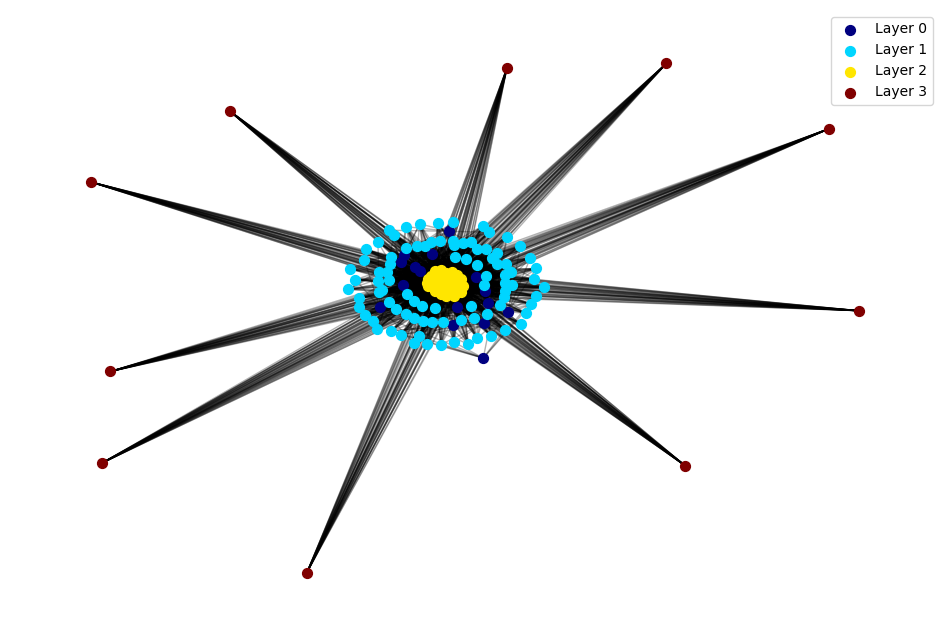

In [9]:
input_size = (4, 4)  # Smaller input size for visualization
layers_params = [
    {'kernel_size': 2, 'stride': 1, 'padding': 0, 'out_channels': 10},
    {'kernel_size': 2, 'stride': 1, 'padding': 0, 'out_channels': 10},
    {'kernel_size': 2, 'stride': 1, 'padding': 0, 'out_channels':10},
]

build_and_plot_cnn_graph(input_size, layers_params)

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

def build_and_plot_cnn_graph_horizontal(input_size, layers_params):
    """
    Build and plot the CNN graph with layers arranged horizontally.
    
    Parameters:
        input_size (tuple): (height, width) of the input layer.
        layers_params (list of dict): Each dict contains 'kernel_size', 'stride', 'padding', 'out_channels'.
    """
    G = nx.DiGraph()  # Directed graph, as connections are directional
    layer_dimensions = []

    # Input layer dimensions
    h_in, w_in = input_size
    c_in = 1  # Assuming grayscale input

    # Create input layer nodes
    for i in range(c_in):
        for x in range(h_in):
            for y in range(w_in):
                node_id = f"l0_n{i}_{x}_{y}"
                G.add_node(node_id, layer=0)

    for layer_idx, params in enumerate(layers_params):
        kernel_size = params['kernel_size']
        stride = params['stride']
        padding = params['padding']
        out_channels = params['out_channels']

        # Calculate output dimensions
        h_out = (h_in + 2 * padding - kernel_size) // stride + 1
        w_out = (w_in + 2 * padding - kernel_size) // stride + 1

        # Store dimensions
        layer_dimensions.append((h_out, w_out, out_channels))

        # Create nodes for this layer
        for c in range(out_channels):
            for i in range(h_out):
                for j in range(w_out):
                    node_id = f"l{layer_idx+1}_n{c}_{i}_{j}"
                    G.add_node(node_id, layer=layer_idx+1)

        # Create edges based on convolution connections
        prev_c = c_in if layer_idx == 0 else layers_params[layer_idx-1]['out_channels']
        prev_h, prev_w = h_in, w_in

        for c_out in range(out_channels):
            for i_out in range(h_out):
                for j_out in range(w_out):
                    node_out = f"l{layer_idx+1}_n{c_out}_{i_out}_{j_out}"

                    for c_in_layer in range(prev_c):
                        for m in range(kernel_size):
                            for n in range(kernel_size):
                                i_in = i_out * stride + m - padding
                                j_in = j_out * stride + n - padding

                                if 0 <= i_in < prev_h and 0 <= j_in < prev_w:
                                    node_in = f"l{layer_idx}_n{c_in_layer}_{i_in}_{j_in}"
                                    G.add_edge(node_in, node_out)

        # Update input dimensions for next layer
        h_in, w_in = h_out, w_out

    # Plotting the graph horizontally
    pos = {}
    x_offset = 0  # Horizontal position of the layer
    for layer_idx, (h, w, c) in enumerate([(input_size[0], input_size[1], c_in)] + layer_dimensions):
        for c_idx in range(c):
            for i in range(h):
                for j in range(w):
                    node_id = f"l{layer_idx}_n{c_idx}_{i}_{j}"
                    # Position nodes of the same layer along a vertical line, and layers horizontally spaced
                    pos[node_id] = (x_offset, -i - c_idx * (h + 1))
        x_offset += 2  # Move to the right for the next layer

    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=False, node_size=50, alpha=0.7, arrows=False)
    plt.title("CNN Architecture Visualized (Horizontal Layout)")
    plt.show()

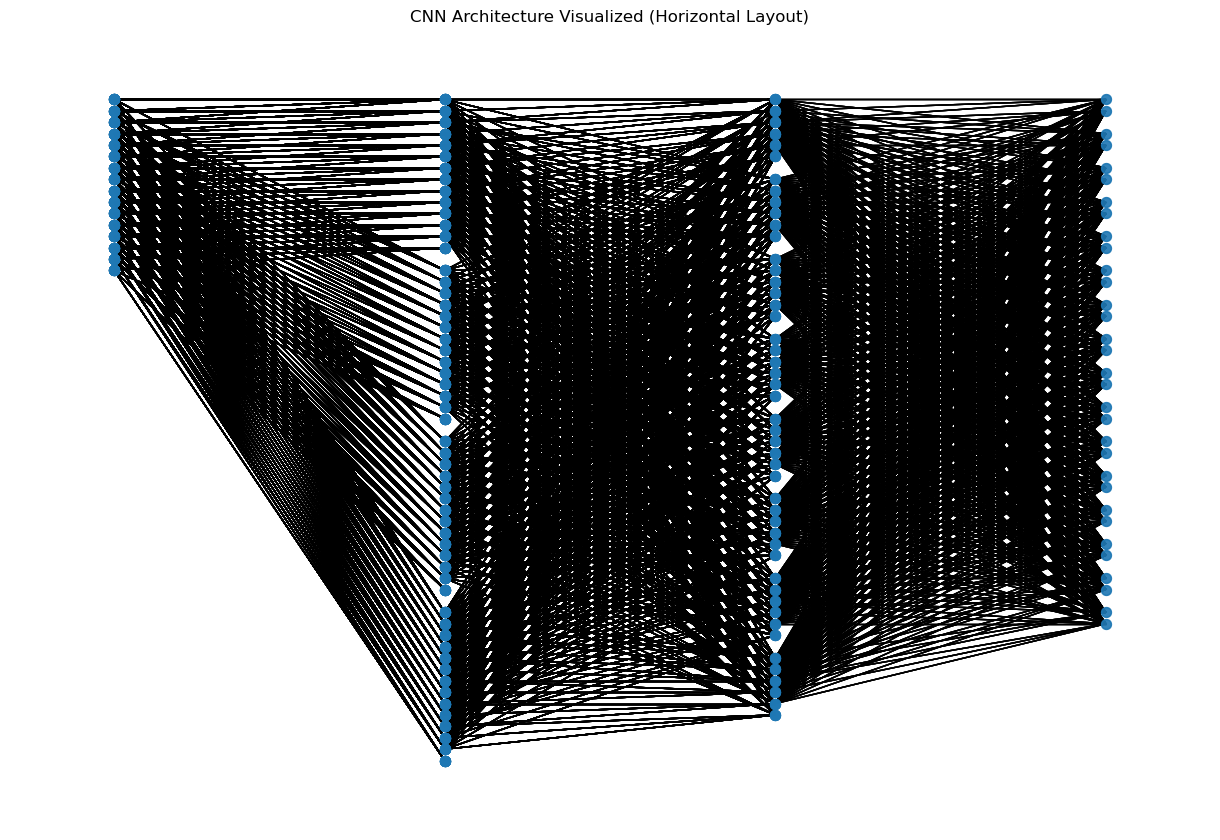

In [11]:
input_size = (16, 16)

# Layers parameters
layers_params = [
    {'kernel_size': 3, 'stride': 1, 'padding': 0, 'out_channels': 4},  # First convolutional layer
    {'kernel_size': 3, 'stride': 2, 'padding': 0, 'out_channels': 8},  # Second convolutional layer
    {'kernel_size': 3, 'stride': 2, 'padding': 0, 'out_channels': 16}, # Third convolutional layer
]

# Build and plot the CNN graph
build_and_plot_cnn_graph_horizontal(input_size, layers_params)

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

def build_and_plot_cnn_graph_horizontal(input_size, layers_params):
    """
    Build and plot the CNN graph with layers arranged horizontally.

    Parameters:
        input_size (tuple): (height, width) of the input layer.
        layers_params (list of dict): Each dict contains 'kernel_size', 'stride', 'padding', 'out_channels'.
    """
    G = nx.DiGraph()  # Directed graph, as connections are directional
    layer_dimensions = []

    # Input layer dimensions
    h_in, w_in = input_size
    c_in = 1  # Assuming grayscale input

    # Create input layer nodes
    for i in range(c_in):
        for x in range(h_in):
            for y in range(w_in):
                node_id = f"l0_n{i}_{x}_{y}"
                G.add_node(node_id, layer=0)

    for layer_idx, params in enumerate(layers_params):
        kernel_size = params['kernel_size']
        stride = params['stride']
        padding = params['padding']
        out_channels = params['out_channels']

        # Calculate output dimensions
        h_out = (h_in + 2 * padding - kernel_size) // stride + 1
        w_out = (w_in + 2 * padding - kernel_size) // stride + 1

        # Store dimensions
        layer_dimensions.append((h_out, w_out, out_channels))

        # Create nodes for this layer
        for c in range(out_channels):
            for i in range(h_out):
                for j in range(w_out):
                    node_id = f"l{layer_idx+1}_n{c}_{i}_{j}"
                    G.add_node(node_id, layer=layer_idx+1)

        # Create edges based on convolution connections
        prev_c = c_in if layer_idx == 0 else layers_params[layer_idx-1]['out_channels']
        prev_h, prev_w = h_in, w_in

        for c_out in range(out_channels):
            for i_out in range(h_out):
                for j_out in range(w_out):
                    node_out = f"l{layer_idx+1}_n{c_out}_{i_out}_{j_out}"

                    for c_in_layer in range(prev_c):
                        for m in range(kernel_size):
                            for n in range(kernel_size):
                                i_in = i_out * stride + m - padding
                                j_in = j_out * stride + n - padding

                                if 0 <= i_in < prev_h and 0 <= j_in < prev_w:
                                    node_in = f"l{layer_idx}_n{c_in_layer}_{i_in}_{j_in}"
                                    G.add_edge(node_in, node_out)

        # Update input dimensions for next layer
        h_in, w_in = h_out, w_out

    # Plotting the graph horizontally with proper grid arrangement
    pos = {}
    x_offset = 0  # Horizontal position of the layer
    layer_spacing = 5  # Space between layers
    node_spacing = 1   # Space between nodes within a layer

    for layer_idx, (h, w, c) in enumerate([(input_size[0], input_size[1], c_in)] + layer_dimensions):
        # Adjust y position to stack channels vertically
        y_offset = 0
        for c_idx in range(c):
            for i in range(h):
                for j in range(w):
                    node_id = f"l{layer_idx}_n{c_idx}_{i}_{j}"
                    # Position nodes in a grid for each channel
                    pos[node_id] = (
                        x_offset + j * node_spacing,  # x-coordinate
                        y_offset - i * node_spacing   # y-coordinate
                    )
            # Update y_offset for the next channel
            y_offset -= (h + 1) * node_spacing
        # Update x_offset for the next layer
        x_offset += (w + layer_spacing) * node_spacing

    plt.figure(figsize=(12, 8))
    nx.draw(
        G, pos, with_labels=False, node_size=20, alpha=0.7, arrows=False,
        node_color=[G.nodes[n]['layer'] for n in G.nodes()], cmap=plt.cm.tab20
    )
    plt.title("CNN Architecture Visualized (Horizontal Layout)")
    plt.axis('equal')
    plt.show()

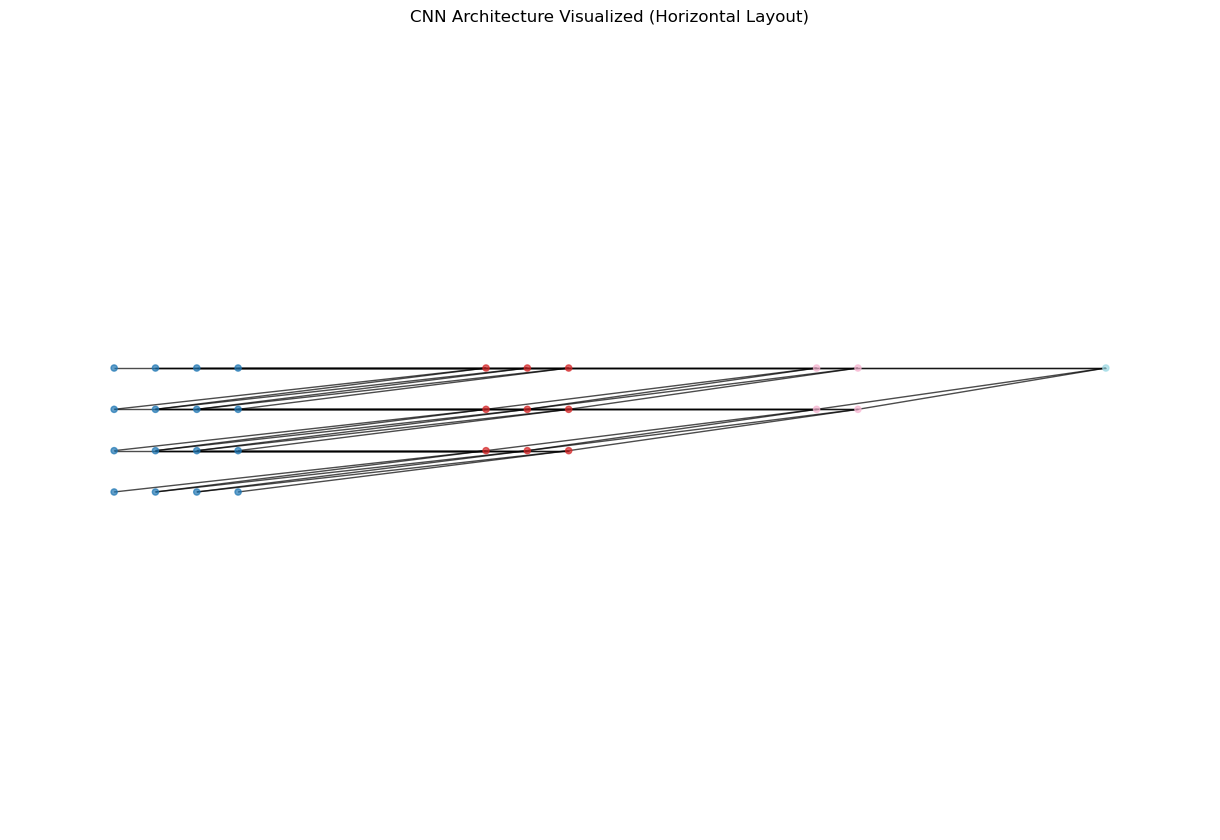

In [22]:
input_size = (4, 4)  # Input size of 16x16 pixels
layers_params = [
    {'kernel_size': 2, 'stride': 1, 'padding': 0, 'out_channels': 1},
    {'kernel_size': 2, 'stride': 1, 'padding': 0, 'out_channels': 1},
    {'kernel_size': 2, 'stride': 1, 'padding': 0, 'out_channels': 1},
]

# Build and plot the CNN graph
build_and_plot_cnn_graph_horizontal(input_size, layers_params)

In [14]:
def calculate_graph_features(G):
    """
    Calculate various graph features for the given CNN graph.

    Parameters:
        G (networkx.DiGraph): The CNN graph.

    Returns:
        dict: A dictionary containing various graph features or a message if the graph is empty.
    """
    # Check if the graph is empty
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()

    if num_nodes == 0 or num_edges == 0:
        return {"error": "Graph is empty. Ensure it has nodes and edges before analyzing."}

    # Degree
    in_degrees = dict(G.in_degree())
    out_degrees = dict(G.out_degree())
    avg_in_degree = sum(in_degrees.values()) / num_nodes
    avg_out_degree = sum(out_degrees.values()) / num_nodes

    # Centrality Measures
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)

    # Sparsity
    max_possible_edges = num_nodes * (num_nodes - 1)  # Fully connected digraph
    sparsity_percentage = 100 * (1 - num_edges / max_possible_edges)

    # Graph Density
    density = nx.density(G)

    # Prepare results
    features = {
        "num_nodes": num_nodes,
        "num_edges": num_edges,
        "avg_in_degree": avg_in_degree,
        "avg_out_degree": avg_out_degree,
        "degree_centrality": degree_centrality,
        "betweenness_centrality": betweenness_centrality,
        "closeness_centrality": closeness_centrality,
        "sparsity_percentage": sparsity_percentage,
        "density": density,
    }

    return features

In [15]:
def build_cnn_graph(input_size, layers_params):
    """
    Build the CNN graph without plotting.

    Parameters:
        input_size (tuple): (height, width) of the input layer.
        layers_params (list of dict): Each dict contains 'kernel_size', 'stride', 'padding', 'out_channels'.

    Returns:
        networkx.DiGraph: The constructed CNN graph.
    """
    G = nx.DiGraph()  # Directed graph, as connections are directional
    h_in, w_in = input_size
    c_in = 1  # Assuming grayscale input

    # Create input layer nodes
    for i in range(c_in):
        for x in range(h_in):
            for y in range(w_in):
                node_id = f"l0_n{i}_{x}_{y}"
                G.add_node(node_id, layer=0)

    for layer_idx, params in enumerate(layers_params):
        kernel_size = params['kernel_size']
        stride = params['stride']
        padding = params['padding']
        out_channels = params['out_channels']

        # Calculate output dimensions
        h_out = (h_in + 2 * padding - kernel_size) // stride + 1
        w_out = (w_in + 2 * padding - kernel_size) // stride + 1

        # Create nodes for this layer
        for c in range(out_channels):
            for i in range(h_out):
                for j in range(w_out):
                    node_id = f"l{layer_idx+1}_n{c}_{i}_{j}"
                    G.add_node(node_id, layer=layer_idx+1)

        # Create edges based on convolution connections
        prev_c = c_in if layer_idx == 0 else layers_params[layer_idx-1]['out_channels']
        prev_h, prev_w = h_in, w_in

        for c_out in range(out_channels):
            for i_out in range(h_out):
                for j_out in range(w_out):
                    node_out = f"l{layer_idx+1}_n{c_out}_{i_out}_{j_out}"

                    for c_in_layer in range(prev_c):
                        for m in range(kernel_size):
                            for n in range(kernel_size):
                                i_in = i_out * stride + m - padding
                                j_in = j_out * stride + n - padding

                                if 0 <= i_in < prev_h and 0 <= j_in < prev_w:
                                    node_in = f"l{layer_idx}_n{c_in_layer}_{i_in}_{j_in}"
                                    G.add_edge(node_in, node_out)

        # Update input dimensions for the next layer
        h_in, w_in = h_out, w_out

    return G

In [16]:
# Define the CNN architecture
input_size = (16, 16)  # Input size of 16x16 pixels
layers_params = [
    {'kernel_size': 3, 'stride': 1, 'padding': 0, 'out_channels': 2},
    {'kernel_size': 3, 'stride': 2, 'padding': 0, 'out_channels': 4},
    {'kernel_size': 3, 'stride': 2, 'padding': 0, 'out_channels': 8},
]

# Build the graph
cnn_graph = build_cnn_graph(input_size, layers_params)

# Inspect the graph
print(f"Number of nodes: {cnn_graph.number_of_nodes()}")
print(f"Number of edges: {cnn_graph.number_of_edges()}")

# Example: Inspect a few nodes and edges
print("Sample nodes:", list(cnn_graph.nodes())[:5])
print("Sample edges:", list(cnn_graph.edges())[:5])

Number of nodes: 824
Number of edges: 7272
Sample nodes: ['l0_n0_0_0', 'l0_n0_0_1', 'l0_n0_0_2', 'l0_n0_0_3', 'l0_n0_0_4']
Sample edges: [('l0_n0_0_0', 'l1_n0_0_0'), ('l0_n0_0_0', 'l1_n1_0_0'), ('l0_n0_0_1', 'l1_n0_0_0'), ('l0_n0_0_1', 'l1_n0_0_1'), ('l0_n0_0_1', 'l1_n1_0_0')]


In [17]:
# After creating the graph with build_and_plot_cnn_graph_horizontal

# Example architecture
input_size = (16, 16)
layers_params = [
    {'kernel_size': 2, 'stride': 1, 'padding': 0, 'out_channels': 200},
    {'kernel_size': 2, 'stride': 1, 'padding': 0, 'out_channels': 200},
    {'kernel_size': 2, 'stride': 1, 'padding': 0, 'out_channels': 200},
]


# Calculate graph features
features = calculate_graph_features(cnn_graph)

# Display the results
for key, value in features.items():
    if isinstance(value, dict):
        print(f"{key}: {list(value.items())[:5]} ...")  # Print only the first 5 for brevity
    else:
        print(f"{key}: {value}")

num_nodes: 824
num_edges: 7272
avg_in_degree: 8.825242718446601
avg_out_degree: 8.825242718446601
degree_centrality: [('l0_n0_0_0', 0.002430133657351154), ('l0_n0_0_1', 0.004860267314702308), ('l0_n0_0_2', 0.007290400972053463), ('l0_n0_0_3', 0.007290400972053463), ('l0_n0_0_4', 0.007290400972053463)] ...
betweenness_centrality: [('l0_n0_0_0', 0.0), ('l0_n0_0_1', 0.0), ('l0_n0_0_2', 0.0), ('l0_n0_0_3', 0.0), ('l0_n0_0_4', 0.0)] ...
closeness_centrality: [('l0_n0_0_0', 0.0), ('l0_n0_0_1', 0.0), ('l0_n0_0_2', 0.0), ('l0_n0_0_3', 0.0), ('l0_n0_0_4', 0.0)] ...
sparsity_percentage: 98.92767403178048
density: 0.010723259682195141


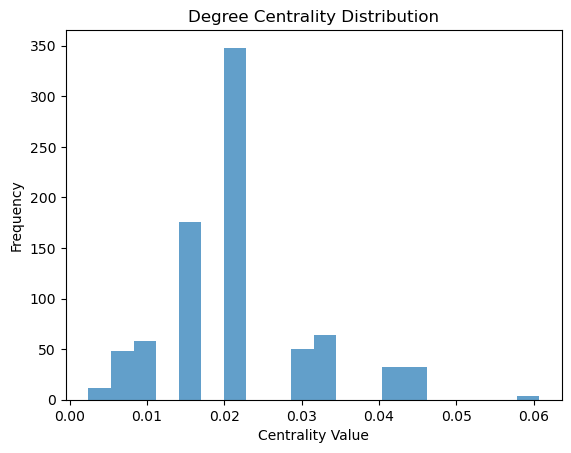

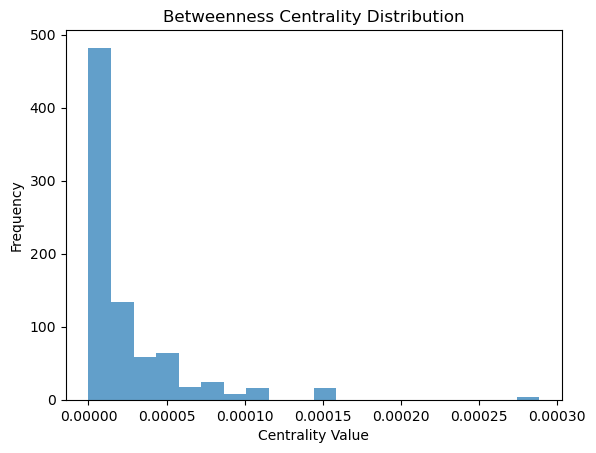

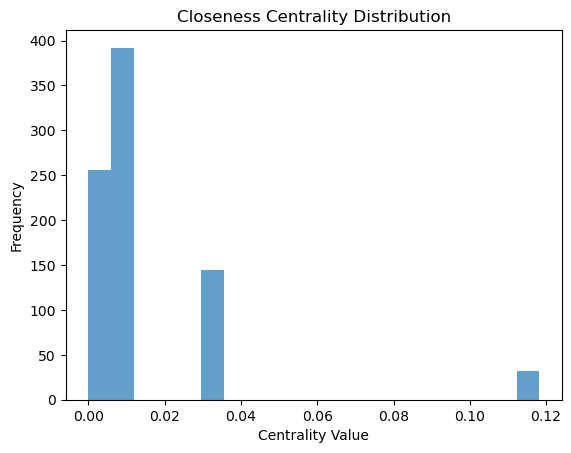

In [18]:
import matplotlib.pyplot as plt

def plot_centrality(centrality, title):
    values = list(centrality.values())
    plt.hist(values, bins=20, alpha=0.7)
    plt.title(title)
    plt.xlabel('Centrality Value')
    plt.ylabel('Frequency')
    plt.show()

# Plot degree, betweenness, and closeness centralities
plot_centrality(features["degree_centrality"], "Degree Centrality Distribution")
plot_centrality(features["betweenness_centrality"], "Betweenness Centrality Distribution")
plot_centrality(features["closeness_centrality"], "Closeness Centrality Distribution")